This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

This will be a milestone! We now get to Step 8: Burgers' equation. We can learn so much more from this equation. It plays a very important role in fluid mechanics, because it contains the full convective nonlinearity of the flow equations, and at the same time there are many known analytical solutions.


Step 8: Burgers' Equation in 2D
----
***

Remember, Burgers' equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks." We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

We know how to discretize each term: we've already done it before!

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = $$
$$\qquad \nu \bigg( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \bigg)$$



$$
\frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = $$
$$\nu \bigg( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \bigg)$$

And now, we will rearrange each of these equations for the only unknown: the two components $u,v$ of the solution at the next time step:

$$u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$ 

$$v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)$$ 

In [1]:
using Plots

nx = 41
ny = 41

Δx = 2.0 / (nx - 1)
Δy = 2.0 / (ny - 1)
    
σ  = 0.0009
ν = 0.01

Δt = σ * Δx * Δy / ν

x = range(0.0, stop=2.0, length=nx)
y = range(0.0, stop=2.0, length=ny)

u₀ = ones(ny, nx)
v₀ = ones(ny, nx)

u₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0
v₀[0.5 .≤ y .≤ 1 , 0.5 .≤ x .≤ 1] .= 2.0

uⁿ⁺¹ = u₀
vⁿ⁺¹ = v₀

row, col = size(u₀)
    
uⁿ = zeros(row,col);  # pre-allocate to speed up!!!
vⁿ = zeros(row,col);  # pre-allocate to speed up!!!



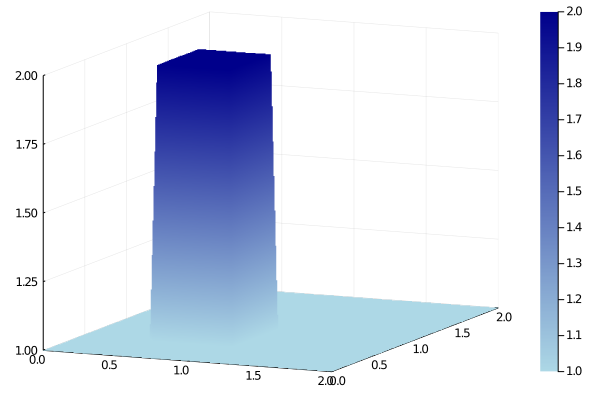

In [2]:
su = surface(x,y,uⁿ⁺¹,c=:blues)

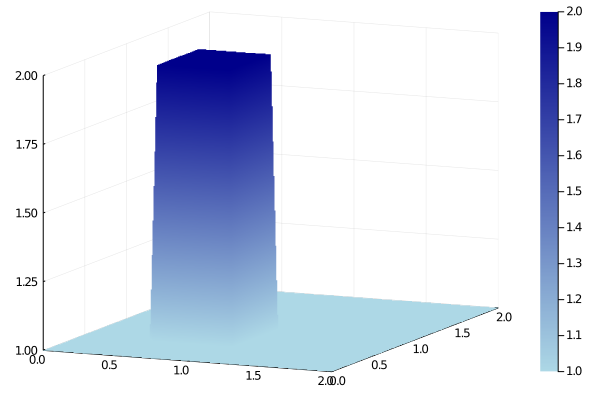

In [3]:
sv = surface(x,y,vⁿ⁺¹,c=:blues)

$$u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$ 

$$v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ $$
$$ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)$$ 

In [4]:
nt = 800

for n in 1:nt
    
    uⁿ .= uⁿ⁺¹
    vⁿ .= vⁿ⁺¹
        
    for j in 1:row
        for i in 1:col
            if j == 1
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            elseif j == row
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            elseif i == col
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            elseif i == 1
                uⁿ⁺¹[j, i] = 1.0
                vⁿ⁺¹[j, i] = 1.0
            else
                uⁿ⁺¹[j, i] = ( uⁿ[j, i] - 
                            (uⁿ[j, i]*Δt/Δx * (uⁿ[j, i] - uⁿ[j, i - 1])) - 
                            (vⁿ[j, i]*Δt/Δy * (uⁿ[j, i] - uⁿ[j - 1, i])) +
                            (ν*Δt/Δx^2*(uⁿ[j, i+1] - 2.0*uⁿ[j, i] + uⁿ[j, i - 1])) + 
                            (ν*Δt/Δy^2*(uⁿ[j+1, i] - 2.0*uⁿ[j, i] + uⁿ[j - 1, i])) )
                
                vⁿ⁺¹[j, i] = ( vⁿ[j, i] - 
                            (uⁿ[j, i]*Δt/Δx * (vⁿ[j, i] - vⁿ[j, i - 1])) - 
                            (vⁿ[j, i]*Δt/Δy * (vⁿ[j, i] - vⁿ[j - 1, i])) +
                            (ν*Δt/Δx^2*(vⁿ[j, i+1] - 2.0*vⁿ[j, i] + vⁿ[j, i - 1])) + 
                            (ν*Δt/Δy^2*(vⁿ[j+1, i] - 2.0*vⁿ[j, i] + vⁿ[j - 1, i])) )
                
            end
        end
    end
        
end

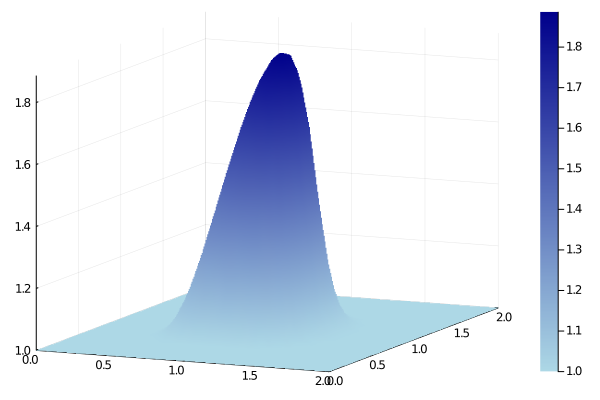

In [5]:
su = surface(x,y,uⁿ⁺¹,c=:blues)

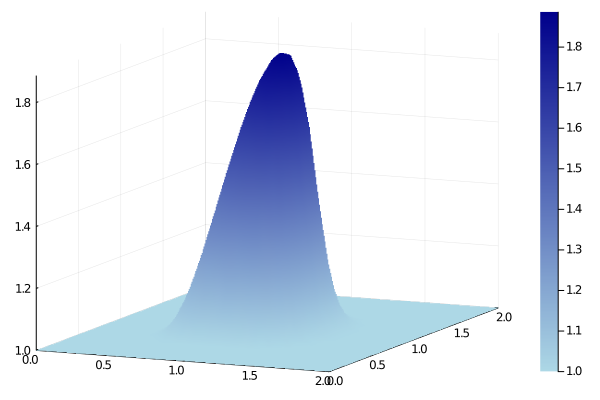

In [6]:
sv = surface(x,y,vⁿ⁺¹,c=:blues)